In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
def select_network(network_num, chosen_data):

    data_ret = chosen_data[(chosen_data['PharmNetworkID'] == network_num)]

    groupcols = ['PharmNetworkName', 'SaleMonth']
    data_ret = data_ret.groupby(groupcols)[['Sale20']].sum()
    data_ret = data_ret.reset_index()

    phname = chosen_data[chosen_data['PharmNetworkID'] == network_num]
    phname_ret = phname.iloc[0]['PharmNetworkName']

    label_ret = 'Аптечная сеть: '

    return data_ret, phname_ret, label_ret

In [91]:
def build_graph(data123, label1, name1):
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    data123['Sale20'].plot(label=name1)

    plt.xlabel('dates', fontsize=14)
    ax = plt.gca()
    plt.xticks(np.arange(0, len(dates), 1.0))
    ax.set_xticklabels(data123['SaleMonth'], fontsize=12, rotation=30)
    plt.tight_layout()

    plt.ylabel('Продажи')
    plt.xlabel('Месяц')
    plt.title(label1 + name1, fontsize=24)
    plt.savefig(name1 +'.png', dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [92]:
def select_region(region_num, dataregions):

    na_reg = dataregions[dataregions['RegionYandexNameL3ID'] == region_num]
    name_reg_ret = na_reg.iloc[0]['RegionYandexNameL3']

    label_reg_ret = 'Регион: '


    data_reg_ret = dataregions[(dataregions['RegionYandexNameL3ID'] == region_num)]

    groupcols2 = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth']
    data_reg_ret = data_reg_ret.groupby(groupcols2)[['Sale20']].sum()
    data_reg_ret = data_reg_ret.reset_index()
    
    return data_reg_ret, name_reg_ret, label_reg_ret

In [93]:
data = pd.read_excel('Sale_2018.xlsx', sheet_name='DrugstoreSale')
pharmnetworks = pd.read_excel('Dictionary.xlsx', sheet_name='Pharmnetworks')
drugstores = pd.read_excel('Drugstores.xlsx', sheet_name='DrugstoreListFN')

In [94]:
data = data.merge(pharmnetworks, left_on='PharmNetworkID', right_on='PharmNetworkID', how='left')
#data2.head()

cols = data.columns.tolist()
#print(cols)
cols = cols[-1:] + cols[:-1]
#print(cols)

data['Sale20'] = data['SaleQuantity']*data['ProductID']

columns_drugstores = ['DrugstoreFNID', 'RegionYandexNameL3', 'RegionYandexNameL3ID']
drugstores_region = drugstores[columns_drugstores]

data = data.merge(drugstores_region, left_on='DrugstoreFNID', right_on='DrugstoreFNID', how='left')
#target_columns = ['PharmNetworkID', 'PharmNetworkName', 'SaleYear', 'SaleMonth', 'ProductID', 'SaleQuantity']
#data2 = data2[target_columns]

data = data.fillna(0)
data['RegionYandexNameL3ID'] = data['RegionYandexNameL3ID'].astype(int)


dates = sorted(data['SaleMonth'].unique())

######################################################################


data2_columns = ['PharmNetworkID', 'PharmNetworkName', 'SaleMonth', 'ProductID', 'Sale20']
data2 = data[data2_columns]

region_columns = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth', 'Sale20']
data_region = data_region[region_columns]

-------Открытие и анализ файла---------

In [75]:
data = pd.read_excel('Sale_2018.xlsx', sheet_name='DrugstoreSale')

In [76]:
#print('У нас %s строк и %s колонок.'%data.shape)
#print('---')
#print(data.info())

In [77]:
#data.describe()

------------Добавление названия аптечных сетей из словаря--------------

In [78]:
pharmnetworks = pd.read_excel('Dictionary.xlsx', sheet_name='Pharmnetworks')
data2 = data.merge(pharmnetworks, left_on='PharmNetworkID', right_on='PharmNetworkID', how='left')
#data2.head()

cols = data2.columns.tolist()
#print(cols)

cols = cols[-1:] + cols[:-1]
#print(cols)


target_columns = ['PharmNetworkID', 'PharmNetworkName', 'SaleYear', 'SaleMonth', 'ProductID', 'SaleQuantity']
data2 = data2[target_columns]
data2['Sale20'] = data2['SaleQuantity']*data2['ProductID']

#data2.head()
dates = sorted(data2['SaleMonth'].unique())

In [79]:
#data2.head()

In [80]:
drugstores = pd.read_excel('Drugstores.xlsx', sheet_name='DrugstoreListFN')

columns_drugstores = ['DrugstoreFNID', 'RegionYandexNameL3', 'RegionYandexNameL3ID']
drugstores_region = drugstores[columns_drugstores]
#print(drugstores_region.head(10))

target_columns2 = ['DrugstoreFNID', 'SaleMonth', 'ProductID', 'SaleQuantity']
data_region = data[target_columns2]
#data_region.head()
#data_region.info()
data_region = data_region.fillna(0)
data_region['DrugstoreFNID'] = data_region['DrugstoreFNID'].astype('int')
#data_region.head()
data_region = data_region.merge(drugstores_region, left_on='DrugstoreFNID', right_on='DrugstoreFNID', how='left')
#print(data_region.head(5))

data_region = data_region.fillna(0)
data_region['RegionYandexNameL3ID'] = data_region['RegionYandexNameL3ID'].astype(int)
data_region['Sale20'] = data_region['SaleQuantity']*data_region['ProductID']
region_columns = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth', 'Sale20']
data_region2 = data_region[region_columns]
#data_region2.head()

# Построение графика продаж за 2018 год для выбранной Аптечной Сети #

In [98]:
pharmid = 5

######

data_select, name1, label1 = select_network(pharmid, data2)
data_select

,PharmNetworkName,SaleMonth,Sale20
0,Мега Фарм (Москва),1,36718
1,Мега Фарм (Москва),2,47293
2,Мега Фарм (Москва),3,35000
3,Мега Фарм (Москва),4,23161
4,Мега Фарм (Москва),5,11806
5,Мега Фарм (Москва),6,8845
6,Мега Фарм (Москва),7,6370
7,Мега Фарм (Москва),8,9537
8,Мега Фарм (Москва),9,56828
9,Мега Фарм (Москва),10,16427


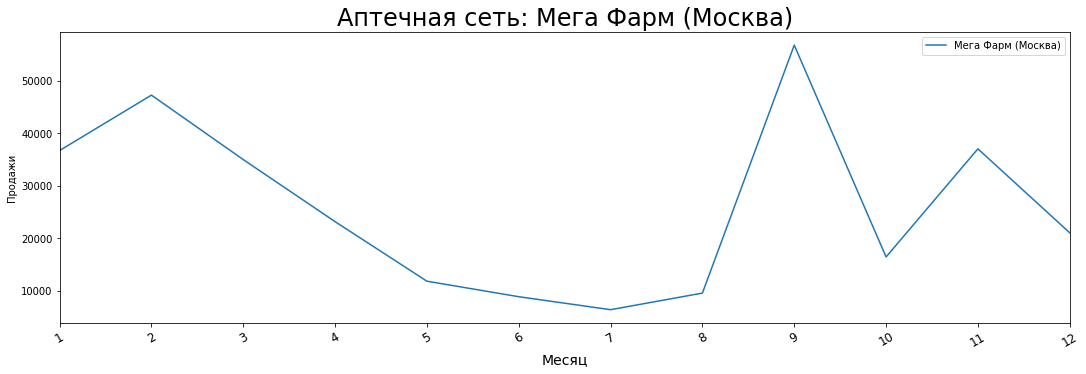

In [82]:
build_graph(data_select, label1, name1)

# Построение графика для 1-го региона #

In [83]:
number_region = 77

#########################

data_reg_in, name_reg_in, label_reg_in = select_region(number_region, data_region)
data_reg_in

,RegionYandexNameL3ID,RegionYandexNameL3,SaleMonth,Sale20
0,77,Москва,1,114876
1,77,Москва,2,142310
2,77,Москва,3,180244
3,77,Москва,4,118993
4,77,Москва,5,74518
5,77,Москва,6,65115
6,77,Москва,7,88317
7,77,Москва,8,111264
8,77,Москва,9,292162
9,77,Москва,10,186826


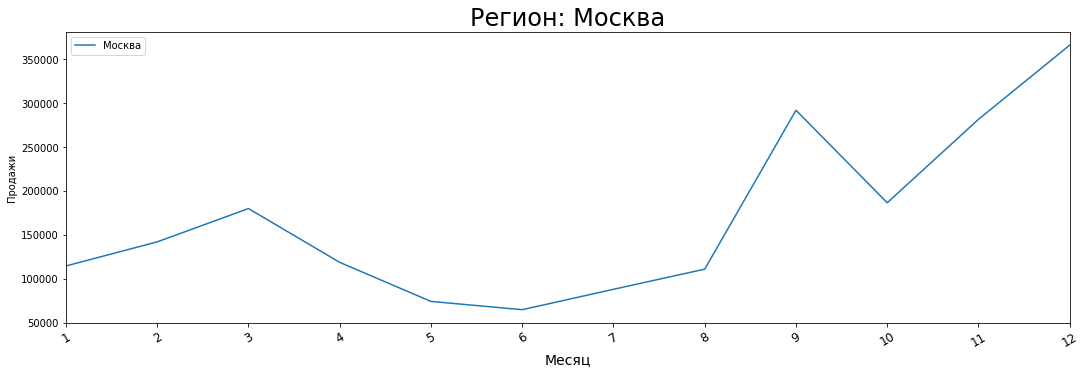

In [84]:
build_graph(data_reg_in, label_reg_in, name_reg_in)

# Построение графиков продаж для НЕСКОЛЬКИХ Аптечных Сетей #

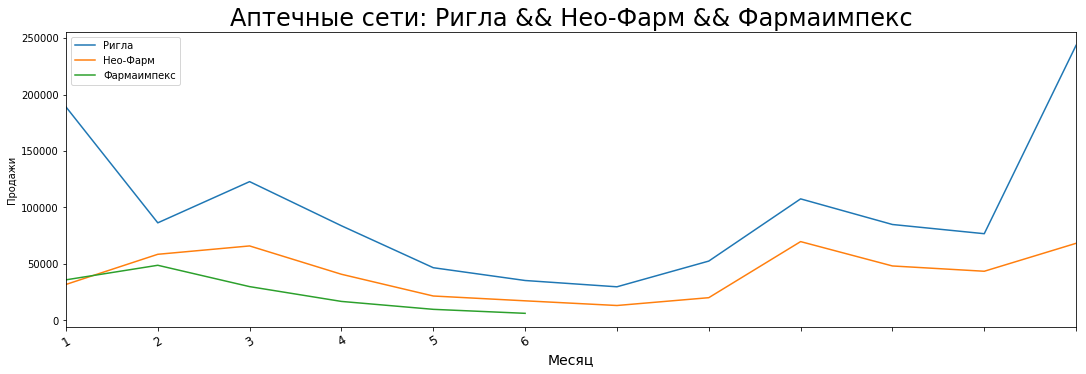

In [85]:
several_n = [1, 3, 4]

#####################
qnames = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))
for i in several_n:
    qdata, qname, qlabel = select_network(i, data2)
    qdata['Sale20'].plot(label=qname)
    qnames.append(qname)
    
re_label = 'Аптечные сети: '
re_label2 = 'Аптечные сети '

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(0, len(dates), 1.0))
ax.set_xticklabels(qdata['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname = ' && '.join(qnames)
    
plt.title(re_label + string_qname, fontsize=24)
plt.savefig(re_label2 + string_qname +'.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

# Построение графика для НЕСКОЛЬКИХ регионов #

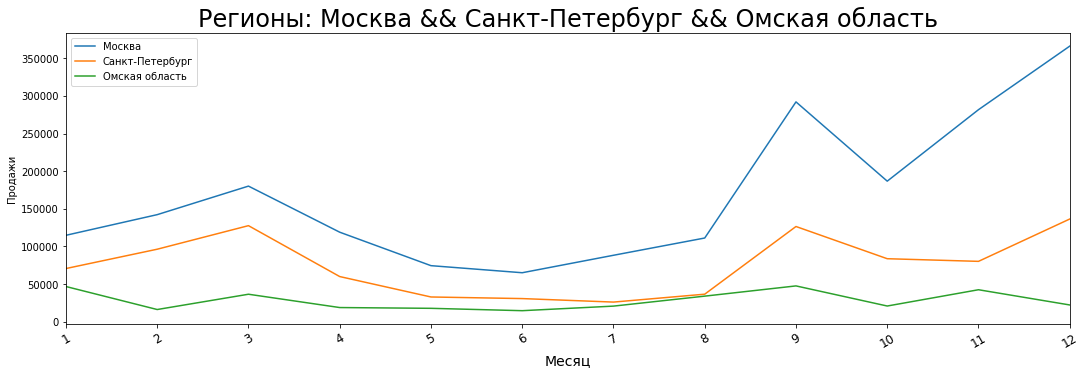

In [86]:
several_regions = [77, 78, 55]

#####################
qnames_r = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))
for j in several_regions:
    qdata_r, qname_r, qlabel_r = select_region(j, data_region2)
    qdata_r['Sale20'].plot(label=qname_r)
    qnames_r.append(qname_r)
    
re_label_r = 'Регионы: '
re_label_r2 = 'Регионы '

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(0, len(dates), 1.0))
ax.set_xticklabels(qdata_r['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname_r = ' && '.join(qnames_r)
    
plt.title(re_label_r + string_qname_r, fontsize=24)
plt.savefig(re_label_r2 + string_qname_r +'.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

# Просмотр аптечных сетей #

In [87]:
network_cols = ['PharmNetworkName', 'PharmNetworkID']
network_id = data2[network_cols]
network_id = network_id.drop_duplicates()
network_id = network_id.sort_values(by=['PharmNetworkID'])
network_id = network_id.reset_index()
network_id = network_id[network_cols]

pd.options.display.max_rows = 150

#network_id

In [88]:
regions_cols = ['RegionYandexNameL3', 'RegionYandexNameL3ID']
regions_id = data_region2[regions_cols]
regions_id = regions_id.drop_duplicates()
regions_id = regions_id.sort_values(by=['RegionYandexNameL3ID'])
regions_id = regions_id.reset_index()
regions_id = regions_id[regions_cols]

#regions_id